In [ ]:
%pip install tensorflow

In [1]:
### Importing Required Libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from numpy import array, asarray, zeros
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.layers import LSTM, Flatten, GlobalMaxPooling1D, Conv1D, SpatialDropout1D, Input
from keras.layers import Activation, Dropout, Dense


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-01-15 12:47:51.916342: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 12:47:54.266284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 12:47:54.266372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 12:47:54.629009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 12:47:55.405544: I external/local_tsl/tsl/cuda/cudart_stub.cc:31]

In [ ]:
#load the dataset

df=pd.read_csv(r'/workspaces/hci_pre/basic_ml/dataset/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
df=df.fillna(' ')

df['title']=df['author']+' '+df['title']


In [4]:
df

,id,title,author,text,label
0,0,Darrell Lucus House Dem Aide: We Didn’t Even S...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Consortiumnews.com Why the Truth Might Get You...,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Jessica Purkiss 15 Civilians Killed In Single ...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Howard Portnoy Iranian woman jailed for fictio...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Michael J. de la Merced and Rachel Abrams Macy...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"Alex Ansary NATO, Russia To Hold Parallel Exer...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
df = df.drop(['id', 'author', 'text'], axis=1)
df

,title,label
0,Darrell Lucus House Dem Aide: We Didn’t Even S...,1
1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",0
2,Consortiumnews.com Why the Truth Might Get You...,1
3,Jessica Purkiss 15 Civilians Killed In Single ...,1
4,Howard Portnoy Iranian woman jailed for fictio...,1
...,...,...
20795,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,0
20796,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",0
20797,Michael J. de la Merced and Rachel Abrams Macy...,0
20798,"Alex Ansary NATO, Russia To Hold Parallel Exer...",1


In [6]:
df.columns.isna().sum()

0

In [7]:
df.shape

(20800, 2)

<Axes: xlabel='label', ylabel='count'>

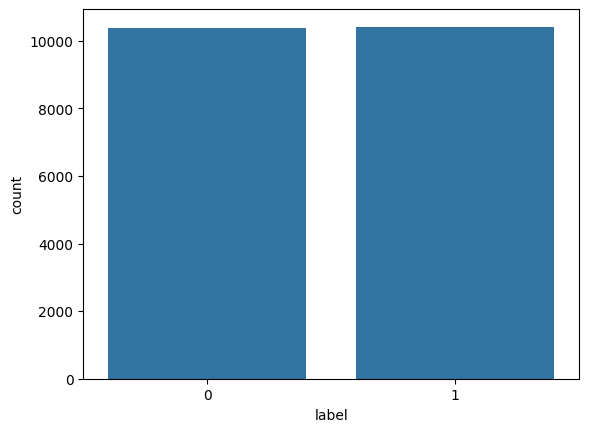

In [8]:
sns.countplot(x = 'label', data =df)

In [9]:
# check sample values
df.sample(10)

,title,label
13638,Penny Starr Internal BLM Memo Leaked: Trump’s ...,0
679,Ryan Banister Hitler or Hillary?,1
17181,Two-time world champion in kickboxing killed...,1
5339,Baran Hines United Nations Finally Acknowledge...,1
18335,Sausage Machine It’s a bit off to do a sick bu...,1
2890,Danny F. Quest Hillary Clinton Sells 20% of US...,1
9982,TheCountess De Plorable Re: Bundy Brothers & 5...,1
18750,Mac Slavo The Ultimate Safe Space: Check Out T...,1
9790,DavidSwanson The U.S. National Bird Is Now a D...,1
9176,TASS Putin says its too early for him to retire,1


In [10]:
# #News title labels
# news = {0:"REAL", 1:"FAKE"}

# def label_decoder(label):
#     return news[label]

# df.label = df.label.apply(lambda x: label_decoder(x))
# df.head()

In [11]:
## preprocessing the data


def data_cleaning(text):
    
    # convert to lowercase
    text = str(text).lower()  
    
    # remove single characters
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text) 
    
    # Remove URls, whitespace characters  
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)  
    
    # Removes all the special characters, digits from 0-9 and Capital Letters  
    text = re.sub(r'[^a-z\s]',' ',string = text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', string = text)  
    
    # create stemming object
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [12]:
df['title'] = df['title'].apply(lambda x: data_cleaning(x))

In [13]:
df

,title,label
0,darrel lucu hous dem aid even see comey letter...,1
1,daniel j flynn flynn hillari clinton big woman...,0
2,consortiumnew com truth might get fire,1
3,jessica purkiss civilian kill singl us airstri...,1
4,howard portnoy iranian woman jail fiction unpu...,1
...,...,...
20795,jerom hudson rapper trump poster child white s...,0
20796,benjamin hoffman n f l playoff schedul matchup...,0
20797,michael j de la merc rachel abram maci said re...,0
20798,alex ansari nato russia hold parallel exercis ...,1


In [14]:
# limit the unique number of words from dataset
max_no_words = 500000
max_sequence_length = 50

In [15]:
# #data Splitting: train, test
# train_data, test_data = train_test_split(df, test_size=0.01,random_state=7)
# print("Train Data size:", len(train_data))
# print("Test Data size", len(test_data))
train_data = df.copy()

In [16]:
train_data.head(10)

,title,label
0,darrel lucu hous dem aid even see comey letter...,1
1,daniel j flynn flynn hillari clinton big woman...,0
2,consortiumnew com truth might get fire,1
3,jessica purkiss civilian kill singl us airstri...,1
4,howard portnoy iranian woman jail fiction unpu...,1
5,daniel nussbaum jacki mason hollywood would lo...,0
6,life life luxuri elton john favorit shark pict...,1
7,alissa j rubin beno hamon win french socialist...,0
8,excerpt fromdraft script donald trump q ampa w...,0
9,megan twohey scott shaneback channel plan ukra...,0


In [17]:
train_data.shape

(20800, 2)

In [18]:
# create tokenizer object
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.title)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 19185


In [19]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.title),
                        maxlen = max_sequence_length)
# x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.title),
#                        maxlen = max_sequence_length)

print("Training X Shape:",x_train.shape)
# print("Testing X Shape:",x_test.shape)

Training X Shape: (20800, 50)


In [20]:
x_train

array([[   0,    0,    0, ...,  143, 3435,  583],
       [   0,    0,    0, ...,  227, 1495,    5],
       [   0,    0,    0, ..., 1159,   42,  113],
       ...,
       [   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ..., 5431, 3311, 5580],
       [   0,    0,    0, ...,  337,  107, 1776]], dtype=int32)

In [21]:
train_data.label.unique().tolist()

[1, 0]

In [22]:
train_data

,title,label
0,darrel lucu hous dem aid even see comey letter...,1
1,daniel j flynn flynn hillari clinton big woman...,0
2,consortiumnew com truth might get fire,1
3,jessica purkiss civilian kill singl us airstri...,1
4,howard portnoy iranian woman jail fiction unpu...,1
...,...,...
20795,jerom hudson rapper trump poster child white s...,0
20796,benjamin hoffman n f l playoff schedul matchup...,0
20797,michael j de la merc rachel abram maci said re...,0
20798,alex ansari nato russia hold parallel exercis ...,1


In [23]:
# y_train = encoder.transform(train_data.label.to_list())
# y_test = encoder.transform(test_data.label.to_list())
y_train = train_data['label']
y_train = y_train.values.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (20800, 1)


In [ ]:
## Embedding Layer
glv_emb = open('/workspaces/hci_pre/basic_ml/dataset/glove.6B.100d.txt', encoding='utf8')

In [25]:
LR = 1e-3
EMBEDDING_DIM = 100
BATCH_SIZE = 32
EPOCHS = 10

In [26]:
embeddings_index = {}

for line in glv_emb:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
        
glv_emb.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [27]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [28]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_sequence_length,
                                          trainable=False)

In [29]:
# build the model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
# compile the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1918500   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2035877 (7.77 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 1918500 (7.32 MB)
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1918500   
             

In [32]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_split=0.1, verbose=1)

Epoch 1/10
585/585 [==============================] - 16s 25ms/step - loss: 0.1760 - acc: 0.9269 - val_loss: 0.0967 - val_acc: 0.9639
Epoch 2/10
585/585 [==============================] - 15s 25ms/step - loss: 0.0622 - acc: 0.9778 - val_loss: 0.0535 - val_acc: 0.9856
Epoch 3/10
585/585 [==============================] - 15s 25ms/step - loss: 0.0395 - acc: 0.9883 - val_loss: 0.0442 - val_acc: 0.9846
Epoch 4/10
585/585 [==============================] - 14s 25ms/step - loss: 0.0208 - acc: 0.9943 - val_loss: 0.0422 - val_acc: 0.9880
Epoch 5/10
585/585 [==============================] - 14s 25ms/step - loss: 0.0139 - acc: 0.9963 - val_loss: 0.0406 - val_acc: 0.9875
Epoch 6/10
585/585 [==============================] - 14s 25ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0552 - val_acc: 0.9851
Epoch 7/10
585/585 [==============================] - 15s 25ms/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.0353 - val_acc: 0.9918
Epoch 8/10
585/585 [==============================] - 14s 25ms

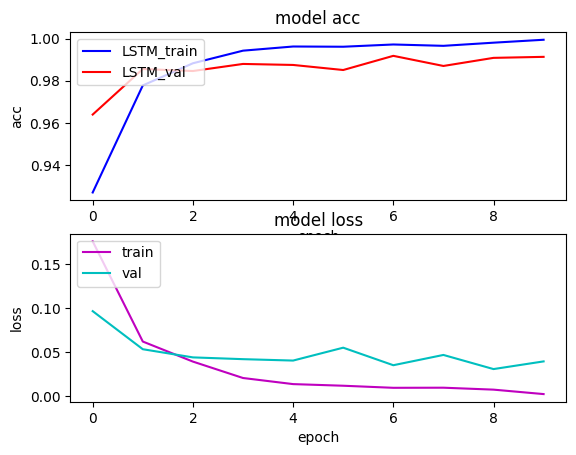

In [33]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model acc')
at.set_ylabel('acc')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [34]:
def predictions(text):
    text1 = tokenizer.texts_to_sequences(text)
    text_padded = pad_sequences(
        text1,
        padding = 'post',
        maxlen = max_sequence_length
    )
    pred = model.predict(text_padded)
    return 'Fake' if pred[0] >= 0.5 else 'Real'

In [35]:
####### Predict 

In [ ]:
#load the dataset

test_df=pd.read_csv(r'/workspaces/hci_pre/basic_ml/dataset/test.csv')
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [37]:
test_df['title']=test_df['author']+' '+test_df['title']

In [38]:
predictions([test_df.iloc[100].title])

1/1 [==============================] - 0s 280ms/step


'Real'

In [39]:
predictions([test_df.iloc[456].title])

1/1 [==============================] - 0s 16ms/step


'Fake'

In [40]:
print([test_df.iloc[100].title])

['Reuters Reuters: Vice Admiral Harward Trump Pick for National Security Adviser - Breitbart']


In [41]:
print([test_df.iloc[456].title])

['Kit Gillet Romania Set for First Female, and First Muslim, Prime Minister - The New York Times']


In [42]:
predictions([test_df.iloc[4501].title])

1/1 [==============================] - 0s 18ms/step


'Real'

In [43]:
print([test_df.iloc[4501].title])

['Warner Todd Huston Judge Erases Aaron Hernandez’s Murder Conviction']
